# CNN(convolutional neural network)

In [1]:
# need library
import numpy as np
import tensorflow as tf
# warning remove
if type(tf.contrib) != type(tf):
    tf.contrib._warning = None
# 딥러닝 구동에 필요한 케라스 함수
from keras.models import Sequential
from keras.layers import Dense    

Using TensorFlow backend.


## data handling

In [15]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# MNIST data (손글씨)
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [16]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("검증셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
검증셋 이미지 수 : 10000 개


### graph

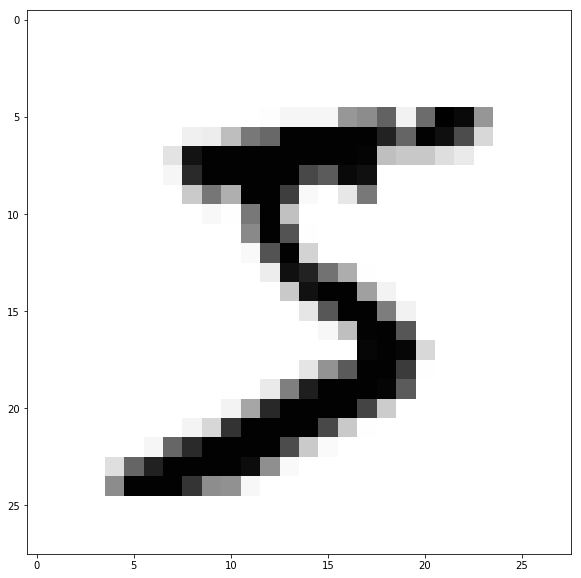

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.imshow(X_train[0], cmap='Greys')
plt.show()

### checking with code

In [18]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')    

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### data dimension transformation and normalization

In [19]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255 # reshape : 1차원 배열로 변환
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
# 이름 확인
print("class : %d " % (Y_class_train[0]))

class : 5 


### one_hot encoding

In [20]:
Y_train = np_utils.to_categorical(Y_class_train,10)
Y_test = np_utils.to_categorical(Y_class_test,10)
# 출력
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Deep Learning basic frame

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
import os
import sys

# 모델 최적화 설정
MODEL_DIR = 'mnist_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5"    
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [23]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.3022 - acc: 0.9155 - val_loss: 0.1550 - val_acc: 0.9545

Epoch 00001: val_loss improved from inf to 0.15496, saving model to mnist_model/01-0.1550.hdf5
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.1245 - acc: 0.9642 - val_loss: 0.1041 - val_acc: 0.9696

Epoch 00002: val_loss improved from 0.15496 to 0.10406, saving model to mnist_model/02-0.1041.hdf5
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0817 - acc: 0.9763 - val_loss: 0.0844 - val_acc: 0.9753

Epoch 00003: val_loss improved from 0.10406 to 0.08441, saving model to mnist_model/03-0.0844.hdf5
Epoch 4/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.0604 - acc: 0.9828 - val_loss: 0.0796 - val_acc: 0.9747

Epoch 00004: val_loss improved from 0.08441 to 0.07960, saving model to mnist_model/04-0.0796.hdf5
Epoch 

In [24]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 18us/step

 Test Accuracy: 0.9814


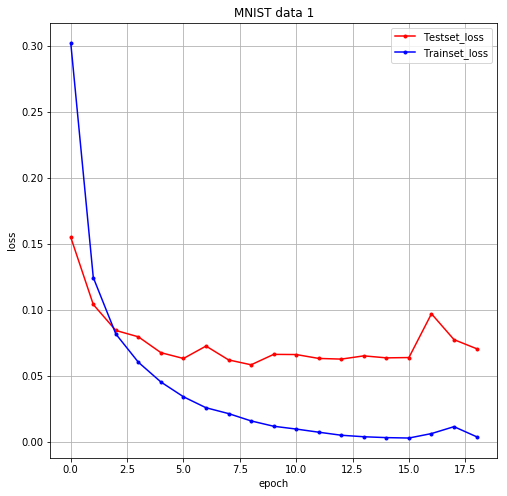

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y_vloss = history.history['val_loss'] # 검증셋으로 측정한 오차
y_loss = history.history['loss'] # 학습셋의 오차
y_acc = history.history['acc'] # 학습셋의 정확도
x_len = np.arange(len(y_loss))

plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper_right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('MNIST data 1')
plt.show()

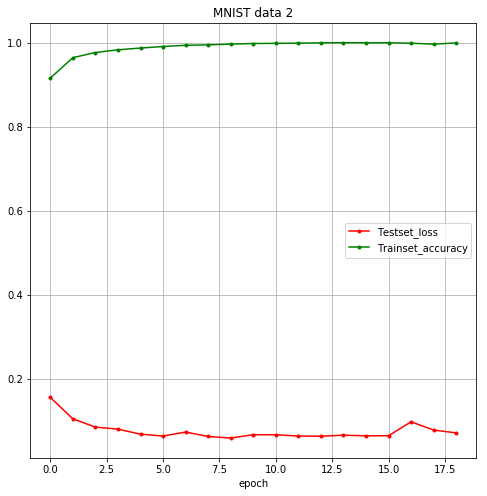

In [30]:
plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_acc, marker='.', c='green', label='Trainset_accuracy')
plt.legend(loc='upper_right')
plt.grid()
plt.xlabel('epoch')
plt.title('MNIST data 2')
plt.show()

## Convolutional Neural Network

### CNN
- 입력된 image에서 다시 한번 특징을 추출하기 위해 mask(filter, window 또는 kernel)를 도입하는 기법

### Max-pooling
- CNN에 의한 결과가 여전히 크고 복잡한 경우 다시 한번 축소하는 과정

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 57s 951us/step - loss: 0.3014 - acc: 0.9087 - val_loss: 0.0601 - val_acc: 0.9813

Epoch 00001: val_loss improved from inf to 0.06007, saving model to mnist_model//01-0.0601.hdf5
Epoch 2/30
60000/60000 [==============================] - 56s 929us/step - loss: 0.0962 - acc: 0.9715 - val_loss: 0.0427 - val_acc: 0.9849

Epoch 00002: val_loss improved from 0.06007 to 0.04268, saving model to mnist_model//02-0.0427.hdf5
Epoch 3/30
60000/60000 [==============================] - 56s 926us/step - loss: 0.0693 - acc: 0.9796 - val_loss: 0.0392 - val_acc: 0.9871

Epoch 00003: val_loss improved from 0.04268 to 0.03920, saving model to mnist_model//03-0.0392.hdf5
Epoch 4/30
60000/60000 [==============================] - 56s 938us/step - loss: 0.0597 - acc: 0.9819 - val_loss: 0.0310 - val_acc: 0.9896

Epoch 00004: val_loss improved from 0.03920 to 0.03099, saving model to mnist_model//04-0.0310

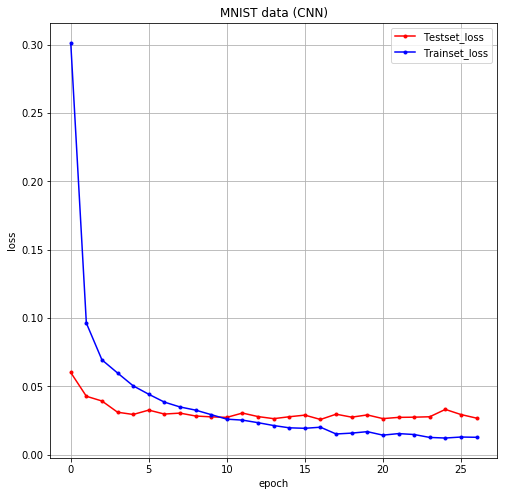

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
# 마스크 갯수, 마스크의 크기, 입력되는 값 및 색상, 활성화 함수
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2)) # pool_size=2 : 절반으로 줄임
model.add(Dropout(0.25)) # 과적합 방지를 위한 25% 노드 끄기
model.add(Flatten()) # CNN이나 max-pooling의 경우 주어진 이미지를 2차원 배열인 채로 다루기 때문에 이를 1차원으로 바꿔야 함
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = 'mnist_model//'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="mnist_model//{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=1, 
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프 
y_vloss = history.history['val_loss'] # 검증셋으로 측정한 오차
y_loss = history.history['loss'] # 학습셋의 오차
x_len = np.arange(len(y_loss))

plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('MNIST data (CNN)')
plt.show()